# Proyecto 1 
# Árboles de decisión para la predicción de diabetes
## Minería de Datos


 * Juan Pablo Álvarez Gamboa 165815   
 
 * Pablo López Landeros 178863

### Lectura de los datos

In [70]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

np.random.seed(165815)

In [71]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Limpieza de datos

In [72]:
def _cleaner(col):
    """
    Clean a specific column
    
    :param: column name to clean
    :return: column cleaned, without blank spaces, point and accents
    """
    return col.lower()\
    .replace(' ','_').replace('.','')\
    .replace('/','_').replace(';','')\
    .replace('á','a').replace('é','e')\
    .replace('í','i').replace('ó','o')\
    .replace('ú','u')


def clean_column_names(df):
    """
    Clean column names of a dataframe: to lower, without accents, without spaces, without punctuation signs
    
    :param: dataframe to clean column names
    :return: dataframe with clean column names
    """
    cols = {col_name: _cleaner(col_name) for col_name in df.columns.values}
    return df.rename(columns=cols, inplace=True)
    

In [73]:
clean_column_names(df)
display(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [74]:
#Tipos de dato de las variables
display(df.dtypes)

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

### Data Profiling

Para el EDA utilizamos la librería Pandas Profiling. Sin embargo, sabemos que es una librería problemática de instalar entonces hicimos también un EDA "manual". Para correr el EDA con Pandas Profiling, hay que descomentar las siguientes dos celdas. 

#### Con Pandas Profiling:

In [75]:
#import pandas profiling
#from pandas_profiling import ProfileReport
#import pandas_profiling as pp
#from IPython.core.display import display, HTML
#from IPython.display import IFrame 

In [76]:
#profilep = df.profile_report()
#profilep.to_notebook_iframe()

#### Con la función vista en clase: 

In [77]:
def numeric_profiling(df, col, profiling_dict):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [78]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head()
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [79]:
variables = df.columns.values
profiling_dict = {}

numeric_profiling_output = [numeric_profiling(df, elem, profiling_dict)\
                            for elem in variables]

In [80]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output[0]).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1
1,min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0
2,mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
3,stdv,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
4,25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0
5,median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0
6,75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1
7,kurtosis,0.159220,0.640780,5.180157,-0.520072,7.214260,3.290443,5.594954,0.643159,-1.60093
8,skewness,0.901674,0.173754,-1.843608,0.109372,2.272251,-0.428982,1.919911,1.129597,0.635017
9,uniques,17.000000,136.000000,47.000000,51.000000,186.000000,248.000000,517.000000,52.000000,2


### Preguntas
1. ¿Qué valor de BMI tiene el 75% de tus datos?

Obtuvimos que el 75% (Q3) de las observaciones tienen un valor de `bmi` entre 0 y 36.6. Esto se puede ver en el "numeric profiling" u obteniendo manualmente el cuartil .75 y ayudándonos con un diagrama de caja.


In [81]:
df['bmi'].quantile(.75)

36.6

Text(0.5, 1.0, 'Box Plot for the BMI variable')

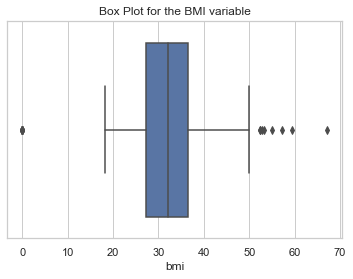

In [82]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["bmi"])
plt.title('Box Plot for the BMI variable')

2. ¿Qué edad corresponde a la mediana?

Desde el "numeric profiling" sabemos que la mediana para la variable `age` es 29.  
Lo corroboramos nuevamente con una línea de código:




In [83]:
df["age"].median()

29.0

3. Cuántos hijos tiene el 75% de las mujeres en el dataset?   

Para saber esto, necesitamos sacar el Q3 de la variable `pregnancies`. Podemos de nueva cuenta hacer un boxplot para ayudarnos visualmente y luego obtenerlo con una línea de código. Esto nos indica que el 75% de las mujeres en nuestro dataset tienen entre 0 y 6 hijos.  


In [84]:
df['pregnancies'].quantile(.75)

6.0

Text(0.5, 1.0, 'Box Plot for the "pregnancies" variable')

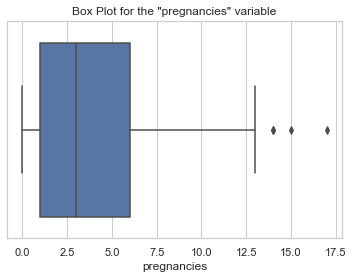

In [85]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["pregnancies"])
plt.title('Box Plot for the "pregnancies" variable')

4. ¿Cuántas observaciones tienes de diabetes?

Si la variable `outcome` vale 1, la paciente tiene diabetes, y si vale 0, no tiene diabetes. Así, tenemos que de las 768 observaciones, 268 tienen diabetes.  

In [86]:
diabetes = df["outcome"].value_counts()
diabetes

0    500
1    268
Name: outcome, dtype: int64

5. ¿Cuál es la mediana de número de hijos para mujeres entre 25 años y 35 años de edad (inclusive)?   

In [87]:
#Creamos un df auxiliar dónde solo tenemos datos de las mujeres entre 25 y 35 años
aux=df[(df["age"]>=25) & (df["age"]<=35)]
#Obtenemos la mediana de embarazos del dataframe auxiliar
print("La mediana de número de hijos para mujeres entre 25 y 35 años es "+str(aux["pregnancies"].median()))

La mediana de número de hijos para mujeres entre 25 y 35 años es 3.0


### Gráficas

## 1.

![title](CorrelationMatrix.jpg)

La matriz de correlación nos muestra el coeficiente de correlación (R^2) entre las distintas variables de nuestro set de datos. En este caso se obtuvo con la librería Pandas Profiling. Si vemos cómo se relaciona la variable `outcome` con las demás, nos podemos dar una primera intuición de cuáles son las variables más relevantes para nuestro árbol de decisión. Notemos que la correlación más grande se da con la variable `glucose`. Esto tiene mucho sentido, ya que los pacientes diabéticos suelen presentar altos niveles de glucosa en la sangre. Otras correlaciones que resaltan son, por ejemplo, entre `age` y `pregnancies`, al igual que entre `insulin` y `skinthickness`. Llama también la atención que `insulin` no presente una correlación fuerte con `outcome` ya que un distinitivo de los pacientes diabéticos suele ser bajos índices de insulina. 

### 2.

([<matplotlib.axis.XTick at 0x21c8d6d2630>,
 <a list of 9 Text major ticklabel objects>)

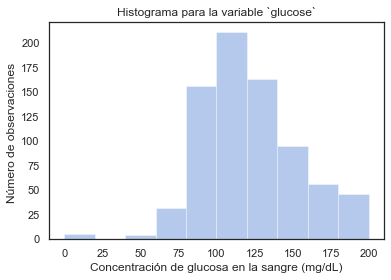

In [88]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.distplot(df["glucose"],kde=False,bins=[0,20,40,60,80,100,120,140,160,180,200])
plt.title('Histograma para la variable `glucose`')
plt.xlabel("Concentración de glucosa en la sangre (mg/dL)")
plt.ylabel("Número de observaciones ")
plt.xticks(np.linspace(start=0, stop=200, num=9))

Al tener una correlación fuerte con la variable target `outcome`, creemos que es importante tener un historgrama de la variable `glucose`, ya que es de esperarse que tenga un alto grado de importancia.   
Los valores de glucosa normales para un adulto "saludable" (asumiendo que las pruebas se hicieron en ayunas) son de entre 80 mg/dL y 100mg/dL. Al consultar nuestro "numeric profiling", vemos que la media está alrededor de 120 mg/dL. 
* Notar: El promedio de observaciones para esta variable en nuestro dataset está por arriba de los ínidces saludables de glucosa en la sangre. 

## 3.

([<matplotlib.axis.XTick at 0x21c8d72b358>,
 <a list of 9 Text major ticklabel objects>)

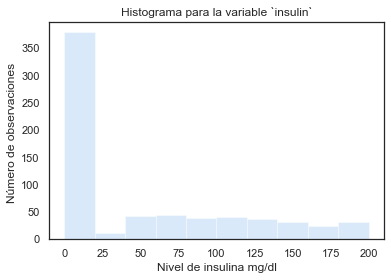

In [89]:
sns.set(color_codes=True)
sns.set(style="white", palette="pastel")
sns.distplot(df["insulin"],kde=False,bins=[0,20,40,60,80,100,120,140,160,180,200])
plt.title('Histograma para la variable `insulin`')
plt.xlabel("Nivel de insulina mg/dl")
plt.ylabel("Número de observaciones ")
plt.xticks(np.linspace(start=0, stop=200, num=9))

Nos sorprendió que casi la mitad de las observaciones de la variable `insulin` son cero. Nosotros asumimos que esto se debe a datos faltantes de esta variable ya que al investigar un poco, encontramos que es prácticamente imposible vivir con nivel 0 de insulina en la sangre. Es importante entonces notar que esta variable tiene un altísimo número de datos faltantes y habría que considerar si realmente hay que utilizarla para el modelo. 

## 4.

Text(0.5, 1.0, 'Diagrama de caja para la variable `edad`')

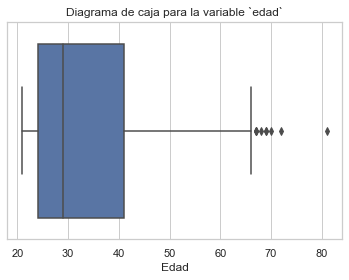

In [90]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["age"])
plt.xlabel("Edad")
plt.title('Diagrama de caja para la variable `edad`')

Nos parece importante tener una idea de la distribución de la variable `age`. Como podemos ver, la mayoría de las mujeres en nuestro set de datos están entre los 22 y los 42 años aproximadamente. En general, son mujeres relativamente jóvenes. También tenemos los datos de mujeres de edad avanzada, aunque son relativamente pocas.

## 5.

Text(0.5, 0, 'Índice de masa corporal (Kg/(m)^2)')

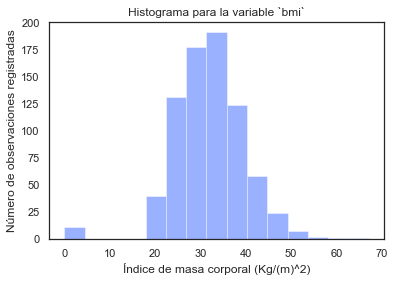

In [91]:
sns.set(color_codes=True)
sns.set(style="white", palette="bright")
sns.distplot(df["bmi"],kde=False,bins=15)
plt.title('Histograma para la variable `bmi`')
plt.ylabel("Número de observaciones registradas")
plt.xlabel("Índice de masa corporal (Kg/(m)^2)")

La variable `bmi` (Body Mass Index) es una proporción que asocia la masa y la estatura de una persona. Se ha visto que un alto `bmi` puede desencadenar la presencia de enfermedades graves en los humanos. Un `bmi` "saludable" está entre 18.5 y 24.9. Al igual que con los niveles de glucosa, vemos que muchas de nuestras observaciones tienen un `bmi` por arriba de este rango. Esto indica que gran parte de nuestras observaciones serán personas con sobrepeso. Otro punto a notar es que todos aquellos valores que están en 0 se consideran datos faltantes. 

### Definición de etiquetas:

Si `outcome` = 0, entonces no tiene diabetes. Esta será la etiqueta negativa.

Si `outcome` = 1, entonces sí tiene diabetes. Esta será la etiqueta positiva.

* TP: El modelo predijo que la mujer tenía diabetes y en realidad sí tenía diabetes.
* FP: El modelo presdijo que la mujer sí tenía diabetes y en realidad no tenía diabetes. 
* TN: El modelo presdijo que la mujer no tenía diabetes y en realidad no tenía diabetes.
* FN: El modelo presdijo que la mujer no tenía diabetes y en realidad sí tenía diabetes.   

Creemos que el error más costoso es el FN ya que si el modelo evalúa que la paciente no tiene diabetes y se confía en su outcome, la paciente no se medicará ni modificará su estilo de vida. Esto puede ser muy perjudicial ya que si un paciente diabético come y bebe como una persona sana, puede desembocar en consecuencias graves como pérdidas de extremidades o incluso la muerte. Sin mencionar el riesgo a la salud de vivir sin medicarse.

### Justificación de métricas: 

Nuestra restricción de negocio nos pide no tener más del 3% de falsos positivos. Para lograr esto, debemos priorizar no fallar si se determina una etiqueta como positiva, es decir, que se prefiera determinar muchas etiquetas como negativas y así elevar el FNR. Por un lado, si escogiéramos como métrica al “precision”, también conocido como “positive predictive value”, obtendríamos una medida de cuánto acertamos al determinar etiquetas positivas. Por otro lado, si escogiéramos al “recall”, mediríamos nuestra razón de éxito en determinar las etiquetas positivas con respecto a todas las que son realmente positivas. Además, escoger el “accuracy” no sería conveniente, puesto que nuestro set de datos tiene muchos más negativos que positivos y podría darnos una idea errónea de desempeño. Creemos que estas métricas no son las mejores para nuestra restricción de negocio, ya que el número de predicciones de etiquetas negativas tenderá a ser grande. Es por esta razón que nosotros decidimos escoger como métrica el “F1 Score”, que es la media harmónica del “precisión” y el “recall”, y así, optimizar ambos.

### Separación de datos en entrenamiento y prueba

In [92]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
X = df.filter(['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age'], axis=1)
y=df.outcome
print(y.shape)
X.columns

(768,)


Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
# train test split
# utilizamos como random state la clave única menor
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=165815)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((537, 8), (537,))

X_test, y_test:  ((231, 8), (231,))


### Primer k-fold cross validation con diferentes hiperparámetros

In [95]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [96]:
sklearn.__version__

'0.22.2.post1'

In [97]:
dt = DecisionTreeClassifier(random_state=165815)
grid = {'min_samples_leaf': [3,5,7,11,13,15,17,19],'min_samples_split':[4,6,8,12,15,20,23,25,27,30,33,35,37,39] ,'max_depth' : [3, 10,15, 18, 20, 30, 35, 40],'criterion': ['gini', 'entropy']}

gs = GridSearchCV(dt, param_grid=grid, scoring='f1', cv=10, n_jobs=-1,return_train_score=True, iid=False)
gs.fit(X_train, y_train)

#Veamos cuál fue el mejor:
best=gs.best_estimator_
best

C:\Users\pablo\Anaconda3\envs\tareaMin\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=37,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=165815, splitter='best')

Con base en lo visto en clase y consultando referencias externas, decidimos experimentar un poco y modificar 3 hiperparámetros con varios valores distintos. Esto con el fin de asegurar que en verdad estábamos obteniendo el mejor modelo. La referencia en la que nos basamos para dar las opciones de hiperparámetros fue el siguiente artículo: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680. Aquí vimos que un buen rango de valores para `min_samples_leaf`es entre 2 y 20. No quisimos poner los máximos (20 y 40) para evitar overfitting. Para `min_samples_split` es entre 2 y 40. Por lo tanto, experimentamos con varios valores en esos rangos y obtuvimos los siguientes hiper parámetros para el mejor árbol:   

* max_depth=10
* min_samples_leaf=17
* min_samples_split=37

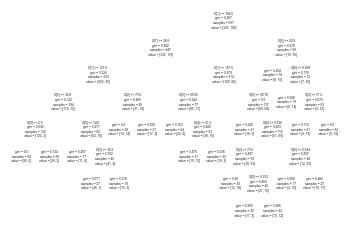

In [98]:
plt.clf()
plot_tree(best)
plt.show()

In [99]:
def get_feature_importance(feature_importances, data):
    fi = pd.Series(feature_importances).sort_values(ascending=False)
    names = pd.Series(data.columns.values)
    
    df_1 = pd.DataFrame({'feature_importance': fi, 'column': fi.index})
    df_2 = pd.DataFrame({'feature': names, 'column': names.index})
    
    df = df_2.merge(df_1).sort_values(by="feature_importance", ascending=False)
    
    return df

In [100]:
get_feature_importance(best.feature_importances_, X)

,feature,column,feature_importance
1,glucose,1,0.576227
7,age,7,0.144131
5,bmi,5,0.129412
6,diabetespedigreefunction,6,0.089485
2,bloodpressure,2,0.041183
4,insulin,4,0.014505
3,skinthickness,3,0.003254
0,pregnancies,0,0.001803


In [101]:
## Estas lineas de código muestran las decisiones como condiciones
## Las comentamos porque ocupan mucho espacio pero si las corremos, puede dar una muy buena idea de como está tomando las decisiones
## el algoritmo. 


#from sklearn.tree import export_text
#decisions = export_text(best, feature_names=names.to_list())
#print(decisions)

In [102]:
# scores de predicción del mejor modelo
predicted_scores = best.predict_proba(X_test)
print(predicted_scores[:10,])

[[0.85       0.15      ]
 [0.61290323 0.38709677]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.83333333 0.16666667]
 [0.96296296 0.03703704]
 [0.85       0.15      ]
 [0.91666667 0.08333333]
 [0.86363636 0.13636364]
 [0.93333333 0.06666667]]


In [103]:
# etiquetas de predicción del mejor modelo
predicted_labels = best.predict(X_test)
print(predicted_labels[:10])

[0 0 1 1 0 0 0 0 0 0]


### Selección de las "mejores" variables
Ya que las variables `skinthickness` y `pregnancies` no aportan ni siquiera 1% a la ganancia de información, las quitaremos. 
Además, aunque cualquier doctor puede corroborar la importancia de la hormona insulina en el transporte de la glucosa hacia los tejidos, y por lo tanto, su gran relación con la diabetes, el algoritmo nos dice que la insulina aporta poca información. En el EDA nos percatamos de que la mayoría de las observaciones de la variable `insulin` son cero, por lo que creemos que tiene sentido quitarla también ya que nivel de insulina cero se interpreta como faltante. Entonces nos quedaremos con las variables que tengan más del 4% de importancia. Nos parece que 4% es un buen punto de corte. Planeábamos dejarlo en 5% y recortar `bloodpressure` también pero entonces el segundo modelo quedaría con solo 4 variables, lo cual no nos pareció suficiente para generar un buen modelo.

In [104]:
#filtramos las variables
X = df.filter(['glucose','bloodpressure','bmi','diabetespedigreefunction','age'], axis=1)
y=df.outcome
print(y.shape)
X.columns

(768,)


Index(['glucose', 'bloodpressure', 'bmi', 'diabetespedigreefunction', 'age'], dtype='object')

In [105]:
#Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=165815)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((537, 5), (537,))

X_test, y_test:  ((231, 5), (231,))


### Segundo k-fold cross validation con diferentes hiperparámetros y variables seleccionadas

In [106]:
dt = DecisionTreeClassifier(random_state=165815)
grid = {'min_samples_leaf': [3,5,7,11,13,15,17,19],'min_samples_split':[4,6,8,12,15,20,23,25,27,30,33,35,37,39] ,'max_depth' : [3, 10,15, 18, 20, 30, 35, 40],'criterion': ['gini', 'entropy']}
gs = GridSearchCV(dt, param_grid=grid, scoring='f1', cv=10, n_jobs=-1,return_train_score=True, iid=False)
gs.fit(X_train, y_train)

#Veamos cuál fue el mejor:
best2=gs.best_estimator_
best2

C:\Users\pablo\Anaconda3\envs\tareaMin\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=165815, splitter='best')

De nuevo, modificamos los hiperparámetros: `min_samples_leaf`,`min_samples_split` y `max_depth`. De nuevo utilizamos varias opciones en cada una y obtuvimos los siguientes hiperparámetros para el mejor árbol:   
* max_depth=10
* min_samples_leaf=11
* min_samples_split=25

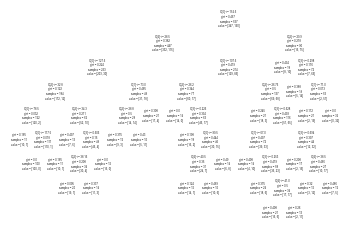

In [107]:
#generamos una representación visual rápida para ver que lo hicimos bien:
plt.clf()
plot_tree(best2)
plt.show()

In [108]:
#De nuevo comentamos esta sección porque el correrla quita mucho espacio. 

#from sklearn.tree import export_text
#decisions = export_text(best2, feature_names=names.to_list())
#print(decisions)

In [109]:
#Obtenemos la importancia de variables para el mejor árbol
get_feature_importance(best2.feature_importances_, X).reset_index()

,index,feature,column,feature_importance
0,0,glucose,0,0.533488
1,4,age,4,0.195858
2,2,bmi,2,0.152369
3,3,diabetespedigreefunction,3,0.079943
4,1,bloodpressure,1,0.038343


In [110]:
# scores de predicción del mejor modelo
predicted_scores = best2.predict_proba(X_test)
print(predicted_scores[:10,])

[[0.75       0.25      ]
 [0.42857143 0.57142857]
 [0.28571429 0.71428571]
 [0.28571429 0.71428571]
 [1.         0.        ]
 [0.78571429 0.21428571]
 [0.75       0.25      ]
 [0.93333333 0.06666667]
 [0.42857143 0.57142857]
 [0.90909091 0.09090909]]


In [111]:
# etiquetas de predicción del mejor modelo
predicted_labels = best2.predict(X_test)
print(predicted_labels[:10])

[0 1 1 1 0 0 0 0 1 0]


### Desempeño

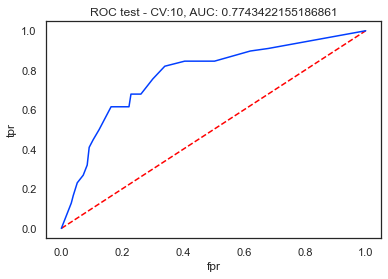

In [112]:
#Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)
   
plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC test - CV:10, AUC: " + str(roc_auc_score(y_test, predicted_scores[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [113]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

### Accuracy

In [114]:
print("Accuracy Score: "+str(accuracy_score(y_test, predicted_labels)))

Accuracy Score: 0.7619047619047619


### Tabla de métricas

In [115]:
precision, recall, thresholds_2 = mt.precision_recall_curve(y_test, predicted_scores[:,1])

In [116]:
thresholds_2 = np.append(thresholds_2, 2.)
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.000000,0.337662,1.000000,0.504854,1.000000,1.000000,0.000000,0.000000
1,0.050000,0.405714,0.910256,0.561265,0.910256,0.679739,0.320261,0.089744
2,0.066667,0.424242,0.897436,0.576132,0.897436,0.620915,0.379085,0.102564
3,0.111111,0.461538,0.846154,0.597285,0.846154,0.503268,0.496732,0.153846
4,0.142857,0.471429,0.846154,0.605505,0.846154,0.483660,0.516340,0.153846
5,0.190476,0.515625,0.846154,0.640777,0.846154,0.405229,0.594771,0.153846
6,0.250000,0.551724,0.820513,0.659794,0.820513,0.339869,0.660131,0.179487
7,0.285714,0.561905,0.756410,0.644809,0.756410,0.300654,0.699346,0.243590
8,0.375000,0.569892,0.679487,0.619883,0.679487,0.261438,0.738562,0.320513
9,0.416667,0.602273,0.679487,0.638554,0.679487,0.228758,0.771242,0.320513


### Selección del punto de corte

Aunque la reestricción de negocio nos indica que no podemos tener más de 3% de falsos positivos, vemos que el corte debe de ser en el índice 19 ya que es el que más se acerca. El índice 20 no se utiliza porque aunque se obtiene un menor fpr, nunca se selecciona el threshold 1 ya que no permite afinar el modelo. Escogemos entonces el punto de corte que más se aproxima a esta restricción:
* `threshold`=0.904762
* índice = 19 


Esto nos indica que todo valor < 0.904762 se tomará como etiqueta negativa (0), paciente no diabética. Mientras que todo valor mayor o igual a 0.904762 se tomará como etiqueta positiva (1) es decir, la paciente es diabética. 


In [117]:
#Obtenemos las métricas para el threshold seleccionado. 
metrics_report[metrics_report.index == 19]

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
19,0.904762,0.684211,0.166667,0.268041,0.166667,0.039216,0.960784,0.833333


In [118]:
#Ajustamos para el threshold que elegimos: 
labels_threshold = [0 if score < 0.904762 else 1 for score in predicted_scores[:,1]]
labels_threshold[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [119]:
labels_w_threshold = pd.Series(labels_threshold)
labels_w_threshold.sum()

15

In [120]:
y_labels = pd.Series(y_test)
y_labels.head()

658    0
250    0
712    1
586    1
410    0
Name: outcome, dtype: int64

In [121]:
df = pd.DataFrame({'predicted': labels_threshold, 'true_label': y_test})
df.head()

,predicted,true_label
658,0,0
250,0,0
712,0,1
586,0,1
410,0,0


In [122]:
#Definimos TP, FP, TN y FN: 
df['tp'] = df[['predicted','true_label']].apply(lambda x: 1 if x.true_label == 1 and x.predicted == x.true_label else 0, axis=1)
df['fn'] = df[['predicted','true_label']].apply(lambda x: 1 if x.true_label == 1 and x.predicted != x.true_label else 0, axis=1)
df['tn'] = df[['predicted','true_label']].apply(lambda x: 1 if x.true_label == 0 and x.predicted == x.true_label else 0, axis=1)
df['fp'] = df[['predicted','true_label']].apply(lambda x: 1 if x.true_label == 0 and x.predicted != x.true_label else 0, axis=1)

In [123]:
df.head()

,predicted,true_label,tp,fn,tn,fp
658,0,0,0,0,1,0
250,0,0,0,0,1,0
712,0,1,0,1,0,0
586,0,1,0,1,0,0
410,0,0,0,0,1,0


### Matriz de confusión

In [124]:
confusion_matrix(y_test, labels_threshold)

array([[148,   5],
       [ 68,  10]], dtype=int64)

### ROC y AUC

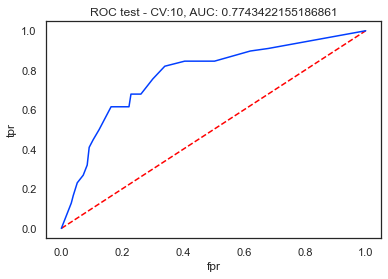

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)
   
plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC test - CV:10, AUC: " + str(roc_auc_score(y_test, predicted_scores[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()